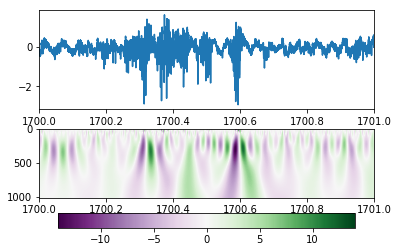

In [23]:
import pylab as p
#import iwavelets.pycwt as w
import math,numpy,matplotlib
import pickle
import numpy as np
import scipy
from scipy import signal
from pylab import *
with open('/home/hera/nodoka/home2/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/home/hera/nodoka/home2/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/Volumes/NO NAME/25kHz-data/B39 Rd.pickle',mode='rb') as fp:
    df = pickle.load(fp)

starttime = 1700
endtime = 1701
start = int(starttime/0.00004)
end = int(endtime/0.00004)
datatime = []
#print(df[start:end])
#specdatab = np.array(df[start:end])
for i in range(len(df[start:end])):
#    print(i)
    datatime.append([(starttime+(i*0.00004))])
#print(datatime)

plt.subplot(2, 1, 1)
xlim(starttime,endtime)
plt.plot(datatime,df[start:end])
del datatime

specdatab = np.array(df[start:end])
specdataa = specdatab.flatten()
fp.close
#widths = np.arange(1, 31)
P = 1024
widths = np.arange(1, P)

plt.subplot(2, 1, 2)
cwtmatr = scipy.signal.cwt(specdataa, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[starttime, endtime, P, 1], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
xlim(starttime, endtime)
#ylim(0, 4096)
plt.colorbar(orientation='horizontal')
plt.show()

#p.show()
del df, widths

NameError: name 'endtime' is not defined